<a href="https://colab.research.google.com/github/Nishant-8009/DL/blob/main/Lec3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline


In [3]:
dataset = MNIST(root='data/',
                download=True,
                transform=ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.0MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 478kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.34MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.76MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
len(dataset)

60000

In [5]:
len(MNIST(root='data/',
                train=False))

10000

In [6]:
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

label: 5


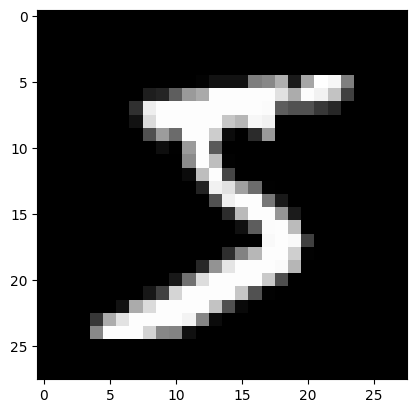

In [7]:
image,label = dataset[0]
plt.imshow(image.permute(1,2,0),cmap='gray')
print('label:',label)

In [8]:
val_size = 10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(50000, 10000)

In [9]:
batch_size=128

In [45]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds , batch_size*2, num_workers=4, pin_memory=True)

images.shape: torch.Size([128, 1, 28, 28])


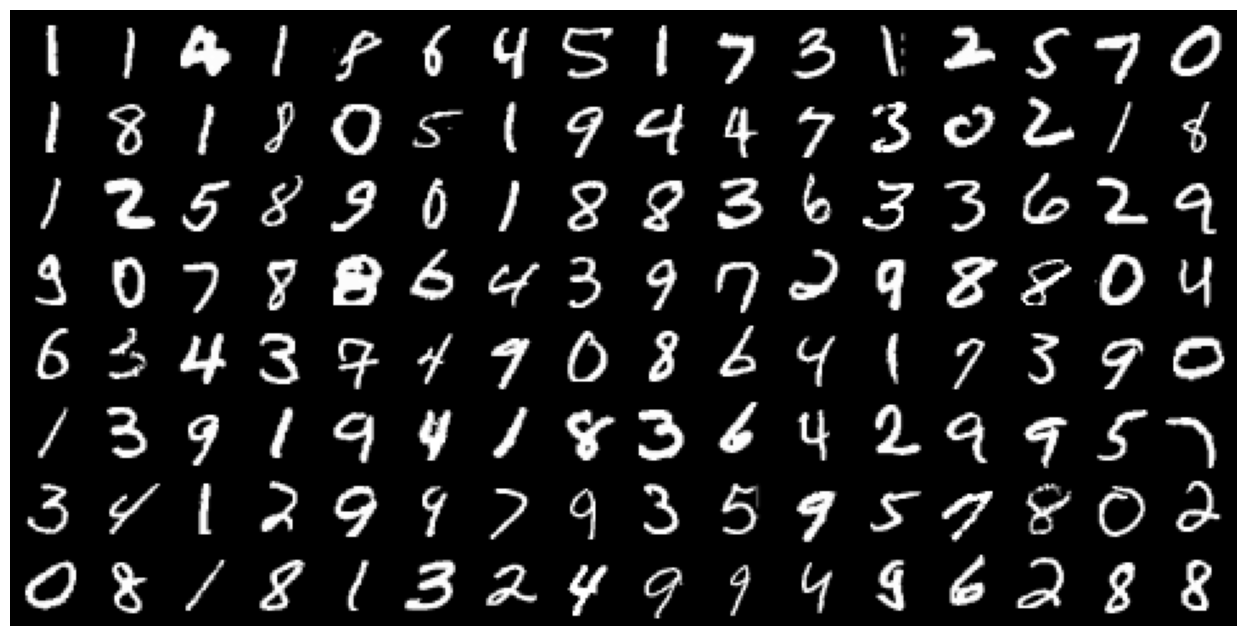

In [46]:
i= 0
for images, _ in train_loader:
    if i == 0:
      print('images.shape:', images.shape)
      plt.figure(figsize=(16,8))
      plt.axis('off')
      plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
      break
    i = i+1

In [12]:
for images,labels in train_loader:
    print('images.shape:', images.shape)
    inputs = images.reshape(-1, 784)
    print('inputs.shape:', inputs.shape)
    break

images.shape: torch.Size([128, 1, 28, 28])
inputs.shape: torch.Size([128, 784])


In [13]:
inputs_size= inputs.shape[-1]
hidden_size= 32

In [14]:
layer1 = nn.Linear(inputs_size, hidden_size)

In [15]:
layer1_outputs = layer1(inputs)

In [16]:
layer1_outputs.shape

torch.Size([128, 32])

In [17]:
layer1_outputs_direct = inputs @ layer1.weight.t() + layer1.bias
torch.allclose(layer1_outputs, layer1_outputs_direct, 1e-3)

True

In [18]:
relu_outputs = F.relu(layer1_outputs)
print('min(layer1_outputs):', torch.min(layer1_outputs).item())
print('min(relu_outputs):', torch.min(relu_outputs).item())

min(layer1_outputs): -0.8138495683670044
min(relu_outputs): 0.0


In [19]:
output_size = 10
layer2 = nn.Linear(hidden_size, output_size)

In [20]:
layer2_outputs = layer2(relu_outputs)

In [21]:
print(layer2_outputs.shape)

torch.Size([128, 10])


In [22]:
F.cross_entropy(layer2_outputs, labels)

tensor(2.3181, grad_fn=<NllLossBackward0>)

In [23]:
outputs = (F.relu(inputs @ layer1.weight.t() + layer1.bias) @ layer2.weight.t() + layer2.bias)

In [24]:
outputs2 = (inputs @ layer1.weight.t()+ layer1.bias) @ layer2.weight.t() + layer2.bias

In [25]:
combined_layer = nn.Linear(inputs_size, output_size)
combined_layer.weight.data = (layer1.weight.t() @ layer2.weight.t()).t()
combined_layer.bias.data = layer1.bias @layer2.weight.t() + layer2.bias

In [26]:
output3 = inputs @ combined_layer.weight.t()+ combined_layer.bias

In [27]:
torch.allclose(outputs2, output3, 1e-3)

True

In [28]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [29]:
class MnistModel(nn.Module):
    """Feedfoward neural network with 1 hidden layer"""
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size, out_size)

    def forward(self, xb):
        # Flatten the image tensors
        xb = xb.view(xb.size(0), -1)
        # Get intermediate outputs using hidden layer
        out = self.linear1(xb)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        return out

    def training_step(self, batch):
        ## Returns the loss over the batch of Data
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [30]:
input_size = 784
hidden_size = 32 # you can change this
num_classes = 10

In [31]:
model = MnistModel(input_size, hidden_size=32, out_size=num_classes)

In [32]:
for t in model.parameters():
    print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [33]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0126, -0.0230,  0.0215,  ..., -0.0356, -0.0105,  0.0311],
         [ 0.0134,  0.0091,  0.0168,  ...,  0.0102, -0.0296, -0.0176],
         [ 0.0205,  0.0065, -0.0226,  ..., -0.0080,  0.0080, -0.0232],
         ...,
         [ 0.0023,  0.0028, -0.0003,  ..., -0.0222, -0.0213, -0.0293],
         [ 0.0287,  0.0151,  0.0178,  ...,  0.0016, -0.0051,  0.0328],
         [-0.0357, -0.0103, -0.0003,  ..., -0.0205, -0.0240, -0.0116]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0041, -0.0097, -0.0202, -0.0344, -0.0131, -0.0029,  0.0293,  0.0258,
         -0.0158,  0.0149,  0.0021, -0.0222, -0.0264, -0.0232,  0.0024,  0.0071,
          0.0188, -0.0018, -0.0016, -0.0009, -0.0342,  0.0033,  0.0192,  0.0229,
          0.0090, -0.0023, -0.0020,  0.0083, -0.0136, -0.0229,  0.0234,  0.0196],
        requires_grad=True),
 Parameter containing:
 tensor([[-1.0442e-01,  9.0011e-02, -8.6557e-02,  1.6971e-01, -1.2380e-02,
          -6.7307e-02, -3.0017e-

In [34]:
for images, labels in train_loader:
    outputs = model(images)
    break

loss = F.cross_entropy(outputs, labels)
print('Loss:', loss.item())
print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

Loss: 2.310556173324585
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.1285,  0.0556,  0.0301, -0.1005,  0.1749,  0.0943,  0.0023,  0.0030,
         -0.1537, -0.1434],
        [ 0.1639,  0.1043,  0.0481, -0.2309,  0.1442,  0.1225, -0.0349,  0.0264,
         -0.0856, -0.0855]])


**Using a GPU**
\
\
As the sizes of our models and datasets increase, we need to use GPUs to train our models within a reasonable amount of time. GPUs contain hundreds of cores that are optimized for performing expensive matrix operations on floating point numbers in a short time, which makes them ideal for training deep neural networks with many layers. You can use GPUs for free on Kaggle kernels or Google Colab, or rent GPU-powered machines on services like Google Cloud Platform, Amazon Web Services or Paperspace.

We can check if a GPU is available and the required NVIDIA CUDA drivers are installed using torch.cuda.is_available

In [36]:
torch.cuda.is_available()

False

In [37]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [38]:
device = get_default_device()
device

device(type='cpu')

In [39]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [40]:
for images, labels in train_loader:
    print(images.shape)
    print(images.device)
    images = to_device(images, device)
    print(images.device)
    break

torch.Size([128, 1, 28, 28])
cpu
cpu


In [41]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

images.shape: torch.Size([128, 1, 28, 28])


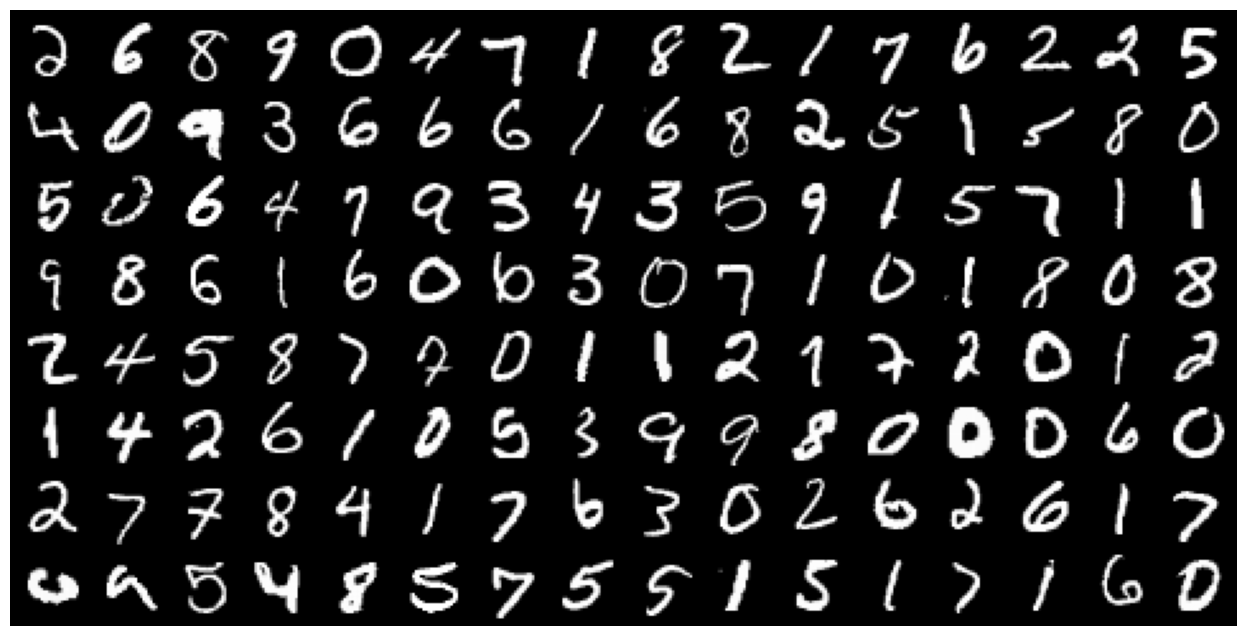

In [47]:
i= 0
for images, _ in train_loader:
    if i == 0:
      print('images.shape:', images.shape)
      plt.figure(figsize=(16,8))
      plt.axis('off')
      plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
      break
    i = i+1

In [48]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

images.shape: torch.Size([128, 1, 28, 28])


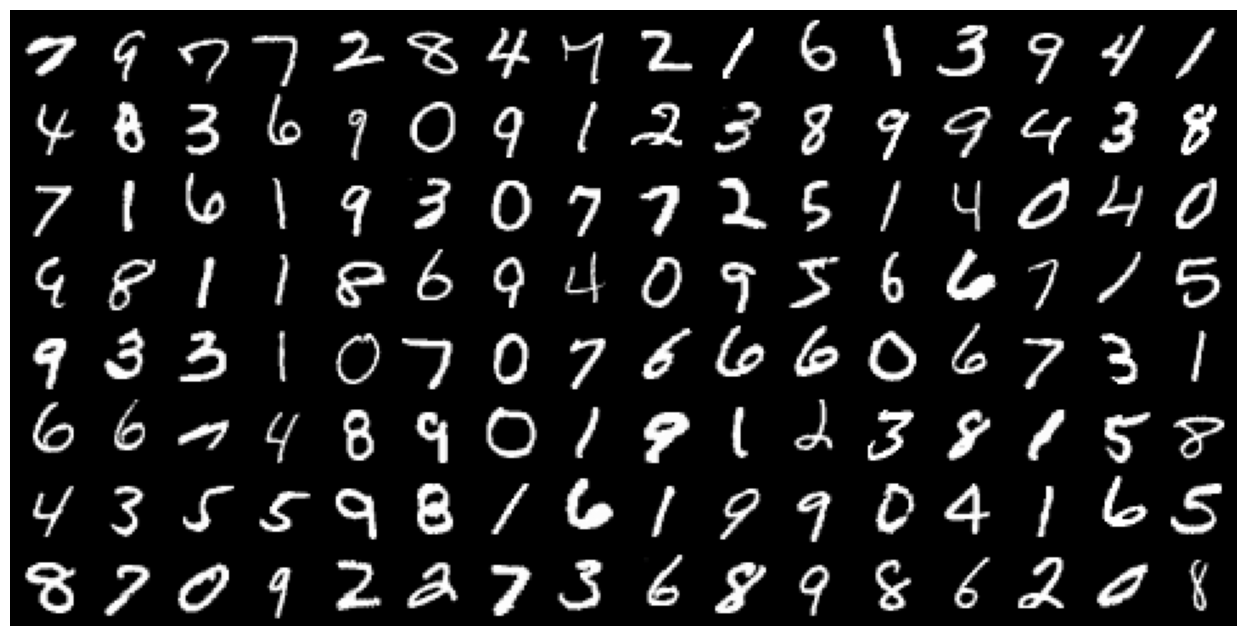

In [49]:
i= 0
for images, _ in train_loader:
    if i == 0:
      print('images.shape:', images.shape)
      plt.figure(figsize=(16,8))
      plt.axis('off')
      plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
      break
    i = i+1

In [50]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [78]:
model = MnistModel(input_size, hidden_size=hidden_size, out_size=num_classes)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [80]:
history = [evaluate(model, val_loader)]
history

[{'val_loss': 2.3120884895324707, 'val_acc': 0.08994140475988388}]

In [81]:
history += fit(5, 0.1, model, train_loader, val_loader)

Epoch [0], val_loss: 0.3648, val_acc: 0.8983
Epoch [1], val_loss: 0.2987, val_acc: 0.9173
Epoch [2], val_loss: 0.2657, val_acc: 0.9260
Epoch [3], val_loss: 0.2437, val_acc: 0.9345
Epoch [4], val_loss: 0.2262, val_acc: 0.9388


In [82]:
history += fit(5, 0.005, model, train_loader, val_loader)

Epoch [0], val_loss: 0.2189, val_acc: 0.9406
Epoch [1], val_loss: 0.2180, val_acc: 0.9408
Epoch [2], val_loss: 0.2166, val_acc: 0.9413
Epoch [3], val_loss: 0.2159, val_acc: 0.9417
Epoch [4], val_loss: 0.2151, val_acc: 0.9419


In [83]:
history += fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.2148, val_acc: 0.9416
Epoch [1], val_loss: 0.2146, val_acc: 0.9416
Epoch [2], val_loss: 0.2144, val_acc: 0.9415
Epoch [3], val_loss: 0.2143, val_acc: 0.9421
Epoch [4], val_loss: 0.2141, val_acc: 0.9416


In [76]:
history += fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.2109, val_acc: 0.9427
Epoch [1], val_loss: 0.2107, val_acc: 0.9425
Epoch [2], val_loss: 0.2106, val_acc: 0.9430
Epoch [3], val_loss: 0.2105, val_acc: 0.9428
Epoch [4], val_loss: 0.2104, val_acc: 0.9428


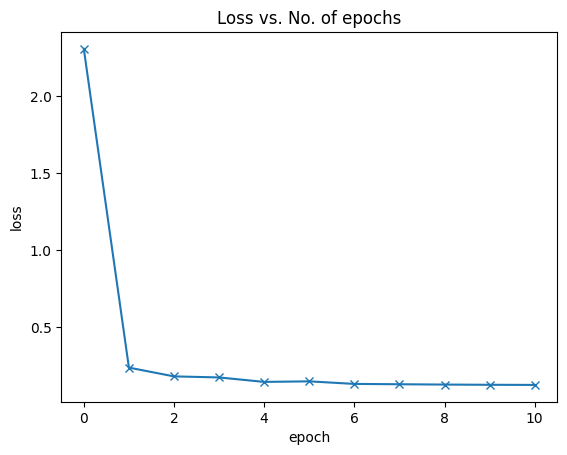

In [55]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

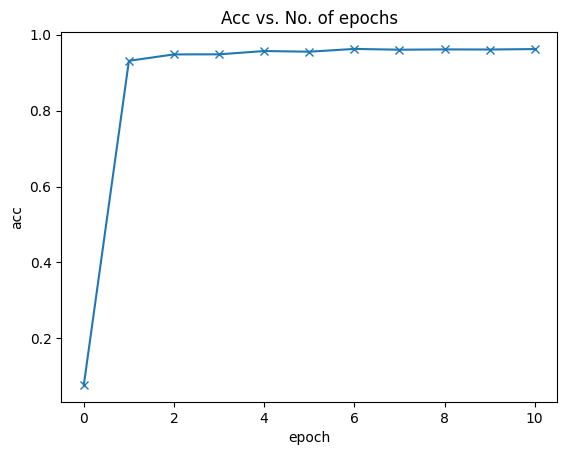

In [56]:
losses = [x['val_acc'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Acc vs. No. of epochs');

In [64]:
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=ToTensor())

In [65]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 9 , Predicted: 9


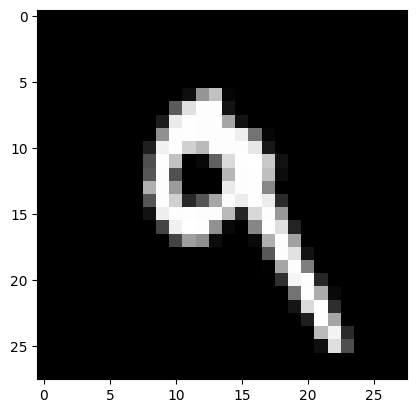

In [84]:
img, label = test_dataset[7]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [85]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size=256),device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.19490940868854523, 'val_acc': 0.94384765625}

In [86]:
torch.save(model.state_dict(), 'mnist-neural.pth')